In [1]:
# Function that takes CSV data from a link and displays it in a dataframe that contains information on the table summary

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
"""
https://storage.googleapis.com/myspaceapp/CPIForecast.csv
https://storage.googleapis.com/myspaceapp/FeedGrains.csv
https://storage.googleapis.com/myspaceapp/Fruit%20Prices%202020.csv
https://storage.googleapis.com/myspaceapp/SSURGO%202.3.2%20Data%20Dictionary_0.csv
"""

'\nhttps://storage.googleapis.com/myspaceapp/CPIForecast.csv\nhttps://storage.googleapis.com/myspaceapp/FeedGrains.csv\nhttps://storage.googleapis.com/myspaceapp/Fruit%20Prices%202020.csv\nhttps://storage.googleapis.com/myspaceapp/SSURGO%202.3.2%20Data%20Dictionary_0.csv\n'

In [4]:
url = "https://storage.googleapis.com/myspaceapp/FeedGrains.csv"

df = pd.read_csv(url)
df.head()

,SC_Group_ID,SC_Group_Desc,SC_GroupCommod_ID,SC_GroupCommod_Desc,SC_Geography_ID,SortOrder,SC_GeographyIndented_Desc,SC_Commodity_ID,SC_Commodity_Desc,SC_Attribute_ID,SC_Attribute_Desc,SC_Unit_ID,SC_Unit_Desc,Year_ID,SC_Frequency_ID,SC_Frequency_Desc,Timeperiod_ID,Timeperiod_Desc,Amount
0,3,Exports and imports,9.0,Barley,202,185.0,South Korea,77,Barley products,24,"Exports, from U.S. to specified destination",7,"1,000 metric tons",1989,1,Monthly,6,Jun,0.715674
1,3,Exports and imports,9.0,Barley,202,185.0,South Korea,77,Barley products,24,"Exports, from U.S. to specified destination",7,"1,000 metric tons",1989,1,Monthly,11,Nov,0.020535
2,3,Exports and imports,9.0,Barley,202,185.0,South Korea,77,Barley products,24,"Exports, from U.S. to specified destination",7,"1,000 metric tons",1989,3,Annual,19,MY Jun-May,2.387758
3,3,Exports and imports,9.0,Barley,202,185.0,South Korea,77,Barley products,24,"Exports, from U.S. to specified destination",7,"1,000 metric tons",1990,1,Monthly,1,Jan,0.696824
4,3,Exports and imports,9.0,Barley,202,185.0,South Korea,77,Barley products,24,"Exports, from U.S. to specified destination",7,"1,000 metric tons",1990,1,Monthly,3,Mar,0.938221


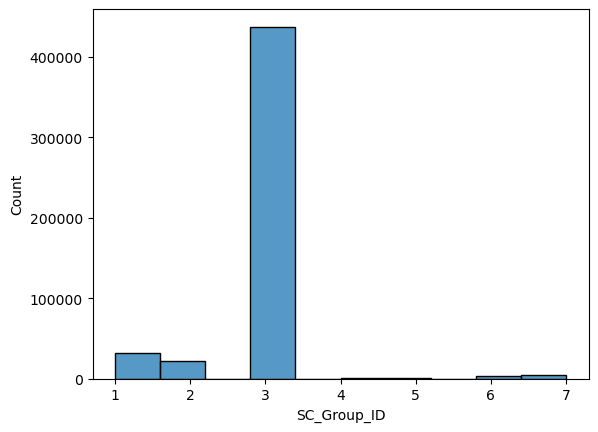

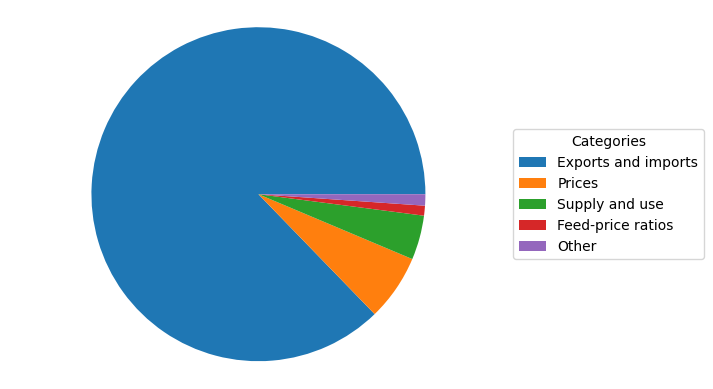

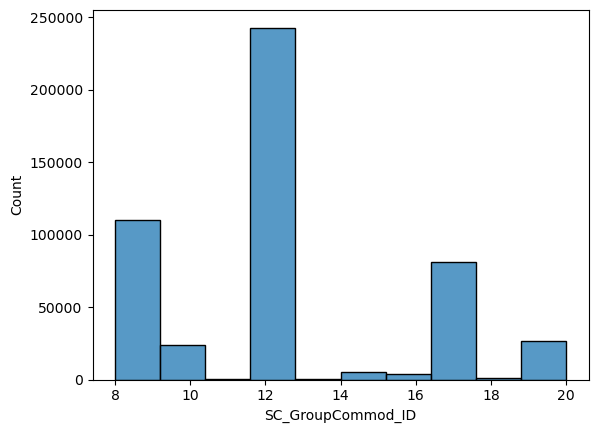

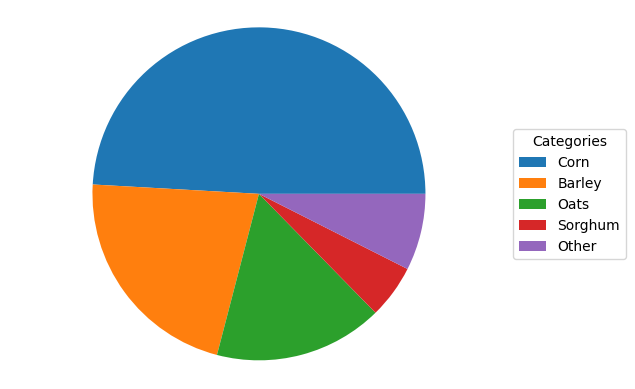

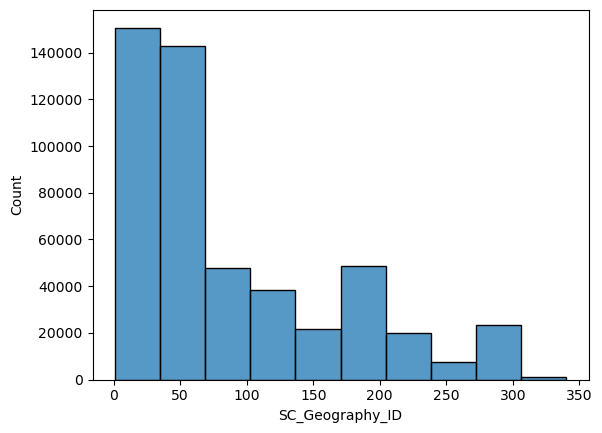

In [22]:
for column in df.columns[:5]:
    if df[column].dtype == 'object':  # Categorical data
        counts = df[column].value_counts()
        top_five = counts[:4]
        other = pd.Series([counts[4:].sum()], index=['Other'])
        final_counts = pd.concat([top_five, other])
        wedges, texts = plt.pie(final_counts, pctdistance=0.85)
       
       # centre_circle = plt.Circle((0,0),0.70,fc='white')
        #fig = plt.gcf()
        #fig.gca().add_artist(centre_circle)

        # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.axis('equal')
        plt.legend(wedges, final_counts.index,
        title="Categories",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1))

        plt.show()
    else:  # Numerical data
        sns.histplot(df[column], bins=10)
        plt.show()

In [25]:
descriptions = df.describe()

In [28]:
# Assume 'df' is your DataFrame
overview = pd.DataFrame()

for column in df.columns[:5]:
    # Create a new DataFrame for this column
    column_df = pd.DataFrame()
    column_df['Column Name'] = [column]

    # Create visual and save as an image file
    if df[column].dtype == 'object':  # Categorical data
        df[column].value_counts().plot(kind='pie')
    else:  # Numerical data
        sns.histplot(df[column])
    plt.savefig(f'{column}_visual.png')
    plt.close()

    # Add image file path to DataFrame
    column_df['Visual'] = [f'<img src="{column}_visual.png" alt="{column} visual">']

    # Add summary statistics to DataFrame
    if df[column].dtype == 'object':  # Categorical data
        stats = str(df[column].value_counts())
    else:  # Numerical data
        stats = str(df[column].describe())
    
    # Replace newline characters with HTML line breaks
    stats = stats.replace('\n', '<br>')
    column_df['Summary Statistics'] = [stats]
    
    # Append this column's DataFrame to the overview DataFrame
    overview = overview.append(column_df)

# Convert overview DataFrame to HTML
overview_html = overview.to_html(escape=False)
with open('overview.html', 'w') as f:
    f.write(overview_html)


/var/folders/qc/zxxkplk90xd364gg1c_mxn780000gn/T/ipykernel_62120/750212543.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overview = overview.append(column_df)
/var/folders/qc/zxxkplk90xd364gg1c_mxn780000gn/T/ipykernel_62120/750212543.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overview = overview.append(column_df)
/var/folders/qc/zxxkplk90xd364gg1c_mxn780000gn/T/ipykernel_62120/750212543.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overview = overview.append(column_df)
/var/folders/qc/zxxkplk90xd364gg1c_mxn780000gn/T/ipykernel_62120/750212543.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overview = overvie

In [29]:
meta_data = {
    1:{
        "url":"https://storage.googleapis.com/myspaceapp/CPIForecast.csv",
        "desc": "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nullam lobortis eros id leo accumsan maximus. Mauris accumsan, tellus sed accumsan sagittis, nisl dui elementum sem, at dictum nibh ex at sapien. Integer mattis nulla vitae nisi porta, id convallis diam suscipit. Nulla ut laoreet magna, non commodo nibh. In id nisi lorem. Donec sit amet diam tincidunt, venenatis mi vitae, commodo orci. Proin risus dolor, aliquet id ex nec, vestibulum varius eros.",
        "source": "https://www.ers.usda.gov/webdocs/DataFiles/50673/CPIForecast.xlsx?v=7836.9",
    },
    2:{
        "url": "https://storage.googleapis.com/myspaceapp/FeedGrains.csv",
        "desc": "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nullam lobortis eros id leo accumsan maximus. Mauris accumsan, tellus sed accumsan sagittis, nisl dui elementum sem, at dictum nibh ex at sapien. Integer mattis nulla vitae nisi porta, id convallis diam suscipit. Nulla ut laoreet magna, non commodo nibh. In id nisi lorem. Donec sit amet diam tincidunt, venenatis mi vitae, commodo orci. Proin risus dolor, aliquet id ex nec, vestibulum varius eros.",
        "source":"https://google.com"
    },
    3:{
        "url":"https://storage.googleapis.com/myspaceapp/Fruit%20Prices%202020.csv",
        "desc":"Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nullam lobortis eros id leo accumsan maximus. Mauris accumsan, tellus sed accumsan sagittis, nisl dui elementum sem, at dictum nibh ex at sapien. Integer mattis nulla vitae nisi porta, id convallis diam suscipit. Nulla ut laoreet magna, non commodo nibh. In id nisi lorem. Donec sit amet diam tincidunt, venenatis mi vitae, commodo orci. Proin risus dolor, aliquet id ex nec, vestibulum varius eros.",
        "source":"https://www.ers.usda.gov/webdocs/DataFiles/51035/Fruit%20Prices%202020.csv?v=3053.8" ,
    },
    4:{
        "url":"https://storage.googleapis.com/myspaceapp/SSURGO%202.3.2%20Data%20Dictionary_0.csv",
        "desc": "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nullam lobortis eros id leo accumsan maximus. Mauris accumsan, tellus sed accumsan sagittis, nisl dui elementum sem, at dictum nibh ex at sapien. Integer mattis nulla vitae nisi porta, id convallis diam suscipit. Nulla ut laoreet magna, non commodo nibh. In id nisi lorem. Donec sit amet diam tincidunt, venenatis mi vitae, commodo orci. Proin risus dolor, aliquet id ex nec, vestibulum varius eros.",
        "source":"https://data.nal.usda.gov/system/files/SSURGO%202.3.2%20Data%20Dictionary_0.csv",
    }

    


}

In [30]:
meta_table = pd.DataFrame(meta_data)
meta_html = meta_table.to_html(escape=False)
with open('meta.html', 'w') as f:
    f.write(meta_html.T)